Lab 4: Classification and k-Nearest Neighbors 

Kobie Williams

2/15/2022

The purpose of this file is to make a K-Nearest Neighbor Classifier and experiment with classifying examples from a survey of Computer Science 1 students.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

In [2]:
file_link = 'https://drive.google.com/uc?export=download&id=1872WZovmmIRvyAra5AENBfUuVetA77ag' 
student_df = pd.read_csv(file_link)
student_df.head(6)

,ID,Textbook,Videos,Lecture,Discussion,Problems,Proactive,CodeExperience,MotivatedByFun,MotivatedByChallenge,MotivatedByGrades,MotivatedByJob,Grade
0,1,3,4,3,1,2,4,1,4,3,4,4,D
1,2,2,3,5,4,3,5,1,4,4,4,4,B
2,3,4,5,5,3,5,3,1,5,4,5,5,C
3,4,1,5,3,4,3,1,1,4,3,1,3,F
4,5,4,3,3,2,2,4,2,5,4,5,5,B
5,6,2,3,4,3,4,3,1,4,4,4,3,D


In [3]:
from sklearn.model_selection import train_test_split

#separate out the data (X)  
X = student_df[['Textbook', 'Videos', 'Lecture', 'Discussion', 'Problems', 'Proactive', 'CodeExperience', 'MotivatedByFun', 'MotivatedByChallenge', 'MotivatedByGrades', 'MotivatedByJob']]

#target variable is grade
y = student_df['Grade']


In [4]:
#Splitting data and labes into training and testing sets 
#random state to a known value of 13 to keep values reproducible and predictable 
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.5, random_state = 13)

In [40]:
#number of neighbors is k ("n_neighbors") 
#distance metric is the euclidean distance 
from sklearn.neighbors import KNeighborsClassifier 
model = KNeighborsClassifier(n_neighbors=4, metric = 'euclidean') 
model.fit(Xtrain,ytrain) 


KNeighborsClassifier(metric='euclidean', n_neighbors=4)

In [41]:
#Compare the model predictions on the test set vs the actual ('ground truth') labels we can measure the model accuracy 

ypred = model.predict(Xtest) 
ypred

array(['C', 'B', 'B', 'A', 'C', 'D', 'C', 'C', 'C', 'B', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'D', 'A', 'A', 'C', 'C', 'C',
       'C', 'C'], dtype=object)

In [42]:
ypred == ytest

29     True
4      True
23     True
51     True
0     False
14    False
40    False
53    False
49    False
6      True
27     True
45    False
41    False
28    False
15     True
31    False
42    False
17     True
5     False
3     False
7     False
20     True
50     True
43    False
12    False
8     False
30    False
24    False
Name: Grade, dtype: bool

In [43]:
from sklearn.metrics import accuracy_score 
accuracy_score(ytest, ypred)

0.35714285714285715

In [44]:
#confusion matrix 
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(ytest, ypred) 

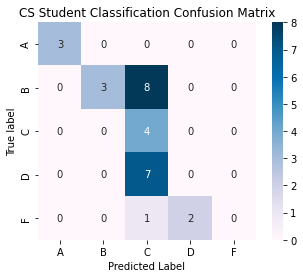

In [46]:
import seaborn as sns 
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="PuBu", 
            xticklabels=model.classes_, 
            yticklabels=model.classes_) 
plt.xlabel('Predicted Label'); 
plt.ylabel('True label')
plt.title('CS Student Classification Confusion Matrix')
plt.show() 

i. The accuracy is not that good in my opinion because it is only giving around 35% accuracy. But compared to random choice, this is way better. Trying to do random choice with this many variables to calculate could be challenging 
ii. The model is best at determining outcomes for the students in the middle ranges of grades and not so much for the outlier ranges of grades. Middle ranges = B,C,D. Outliers = A, F